In [1]:
import os
os.chdir('..')
from visual import config
from utils.geotif_io import readTiff
from utils.imgShow import imgShow
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


In [89]:
## 01, 04, 16 for visualization in paper
idx = '20'
path_as = config.root_proj + '/data/dset/s1_ascend/s1as_scene'+ idx + '_pad.tif'
path_des = config.root_proj + '/data/dset/s1_descend/s1des_scene' + idx + '_pad.tif'
path_truth = config.root_proj + '/data/dset/s1_truth/scene' + idx + '_pad_wat_truth.tif'

path_truth


'/home/yons/Desktop/developer-luo/Monthly-Surface-Water-in-Tibet/data/dset/s1_truth/scene20_pad_wat_truth.tif'

In [91]:
s1_as, s1_as_info = readTiff(path_as)
s1_des, s1_des_info = readTiff(path_des)
truth, truth_info = readTiff(path_truth)
scene = np.concatenate((s1_as, s1_des), axis=-1)


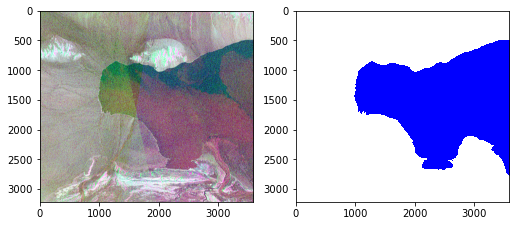

In [92]:
### check the scene and the truth
colors = ['white', 'blue'] 
cmap = mpl.colors.ListedColormap(colors)

plt.figure(figsize=(13,6))
plt.subplot(1,3,1)
imgShow(scene[894:-894,894:-894,:], clip_percent=2, \
                      per_band_clip='True', color_bands=(2,1,3))
plt.subplot(1,3,2)
plt.imshow(truth[894:-894,894:-894], cmap=cmap)
# plt.subplot(1,3,3)
# imgShow(s2_img)


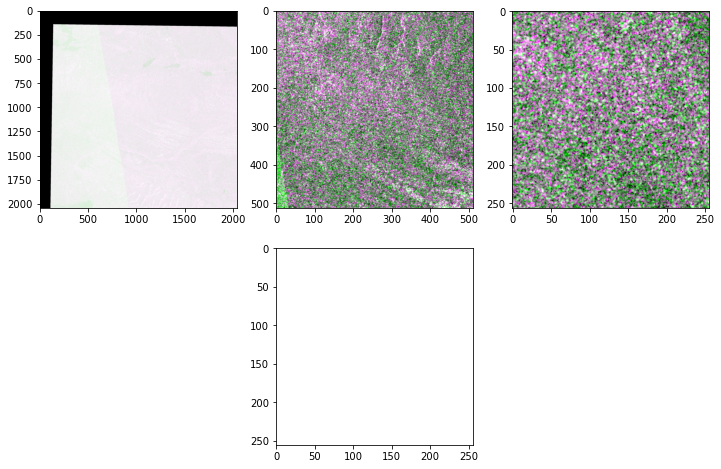

In [6]:
### check the multiscale patch

plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
imgShow(s1_as[758:2798, 808:2848, :], color_bands=(0,1,0), clip_percent=1, per_band_clip='True')
# plt.plot([894,1154,1154,894,894], [894,894,1154,1154,894], color='SandyBrown', linewidth=2) # outline
# plt.plot([768,1282,1282,768,768], [768,768,1282,1282,768], color='Gold', linewidth=2) # outline

plt.subplot(2,3,2)
imgShow(s1_as[1522:2034, 1572:2084, :], color_bands=(0,1,0), clip_percent=1.5, per_band_clip='True')
# plt.plot([128,384,384,128,128], [128,128,384,384,128], color='SandyBrown', linewidth=2) # outline

plt.subplot(2,3,3)
imgShow(s1_as[1650:1906, 1700:1956, :], color_bands=(0,1,0), clip_percent=1.5, per_band_clip='True')

# plt.subplot(2,3,4)
# imgShow(s2_img[1650:1906, 1700:1956, :], color_bands=(2,1,0), clip_percent=2)

plt.subplot(2,3,5)
plt.imshow(truth[1650:1906, 1700:1956], cmap=cmap)


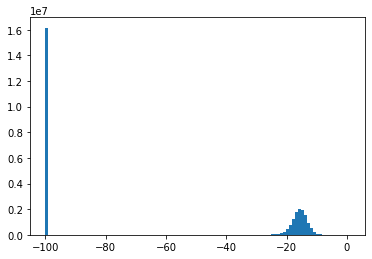

In [6]:
plt.hist(s1_as[:,:,0].ravel(), bins=100);
